# Wind Power Prediciotn using Time Series


<h1><center><a href=https://colab.research.google.com/github/Nemczek/wind_power_prediction/blob/main/wind_power_prediction_time_series.ipynb>Open in Colab!</a></center></h1>

<center><img src='windmills.jpg'></center>

Continued prediction of Wind Power Generation data set using time series

Note: You can run notebook directly in your browser by replacing .com with .dev in github link.
Example: [https://github.dev/Nemczek/wind_power_prediction_time_series](https://github.dev/Nemczek/wind_power_prediction_time_series)

## Packages 

In [ ]:
# Run only once - installing packages. Needed to run notebook in browser
install.packages(c("forecast", "tempdisagg", "tidyverse"))

In [1]:
library(forecast)
library(tempdisagg)
library(tidyverse)

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


## Data loading and cleaning/prepering 

In [2]:
dane <- read.csv("https://raw.githubusercontent.com/Nemczek/wind_power_prediction/main/Location1.csv")

### Aggregate data into monthly data and load and split into test and teaching data

In [3]:
dane$Time <- as.Date(dane$Time)
dane$Miesiac <- format(dane$Time, "%Y-%m")

dane.fan <- dane %>%
  group_by(Miesiac) %>%
  summarise(srednia_Power = mean(Power))

dane.fan <- data.frame(dane.fan$srednia_Power)

### Cleaning data and looking for Trend and seasonality

In [4]:

fan <- ts(dane.fan, start = c(2017,1), frequency = 12)

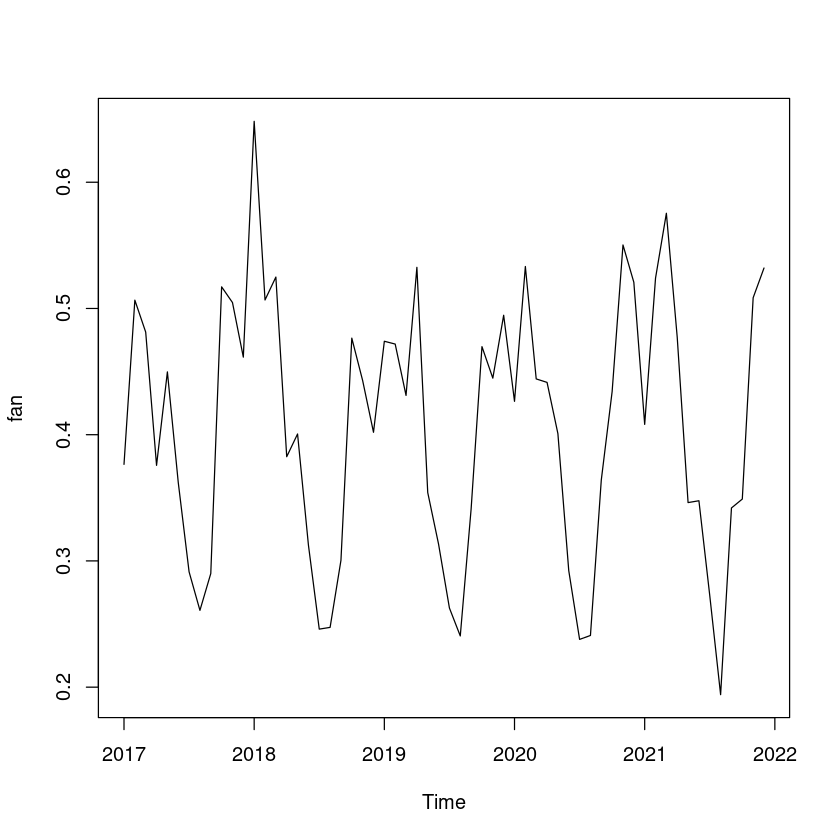

In [5]:
ts.plot(fan)

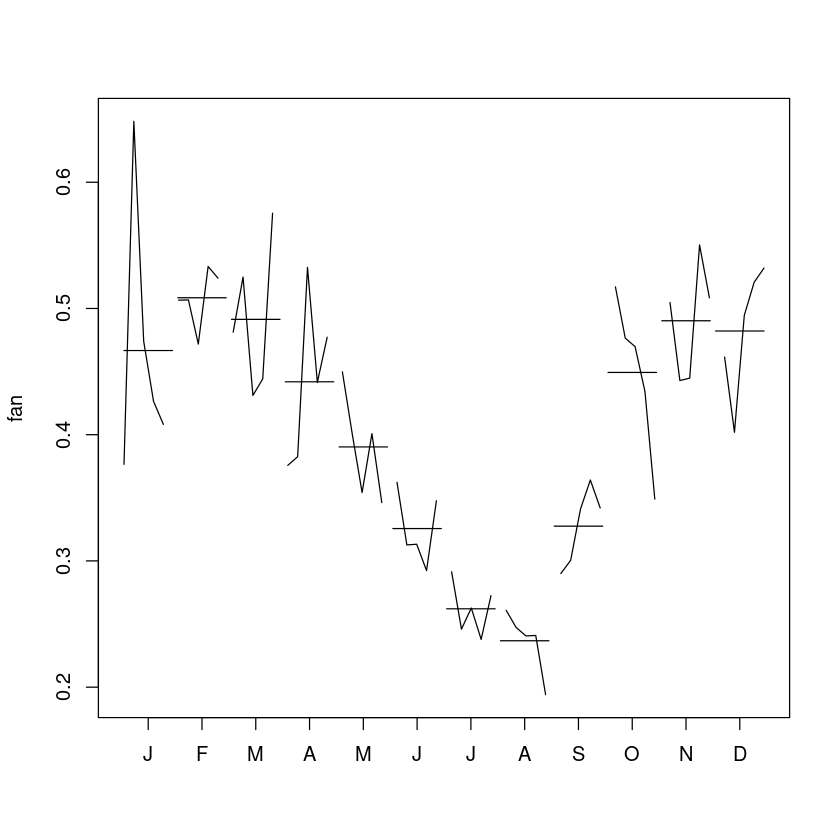

In [6]:
monthplot(fan)

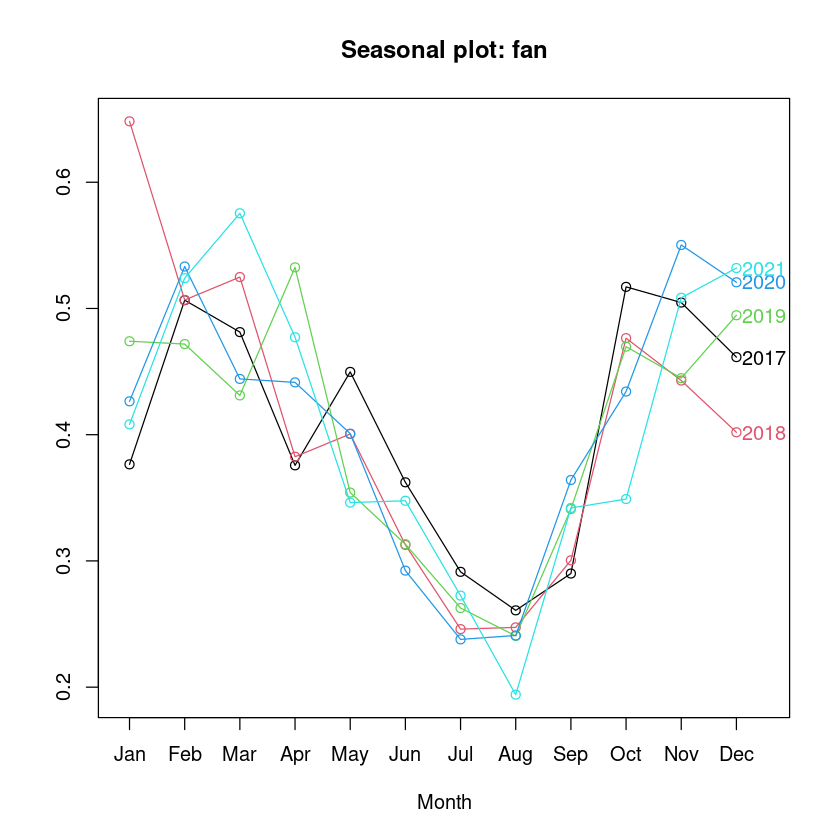

In [7]:
seasonplot(fan, year.labels = T, col = 1:5)

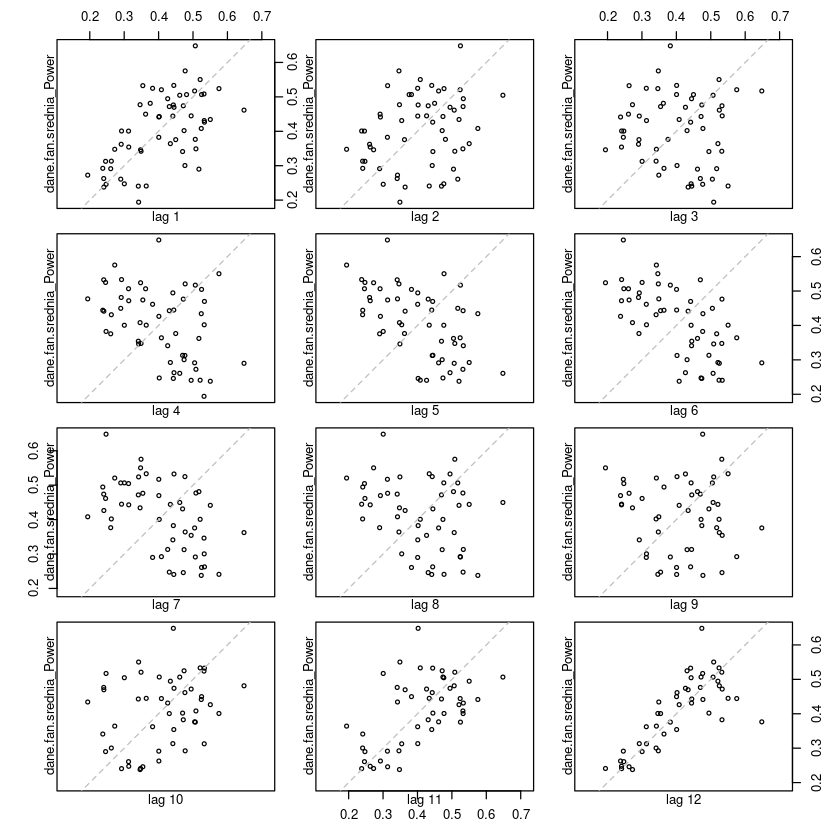

In [8]:
lag.plot(fan, do.lines = F, lags = 12) # There is T i S

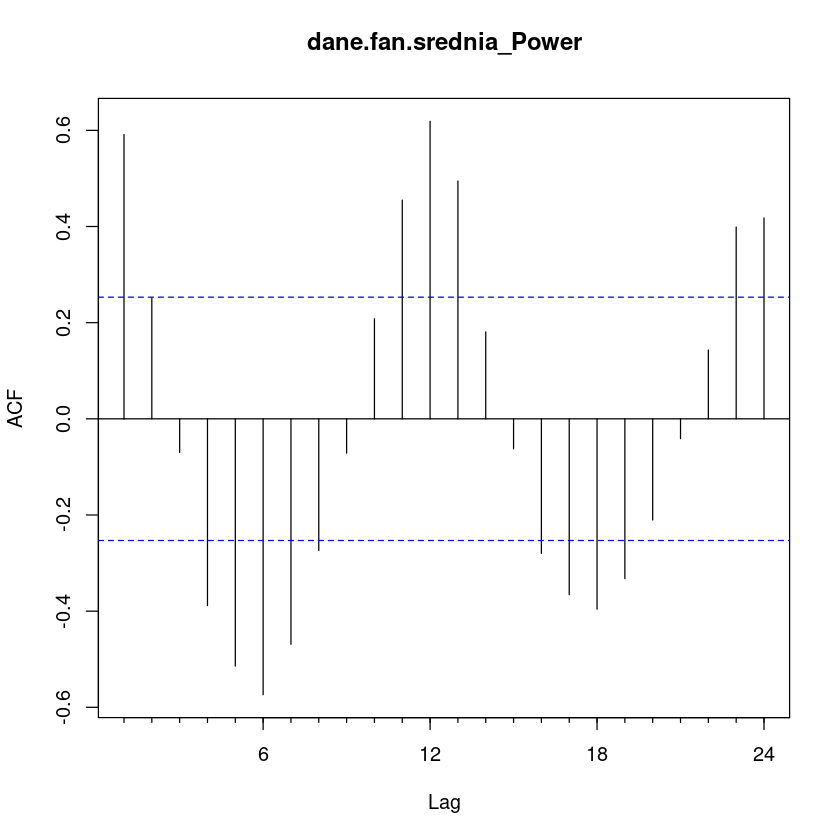

In [9]:
Acf(fan)

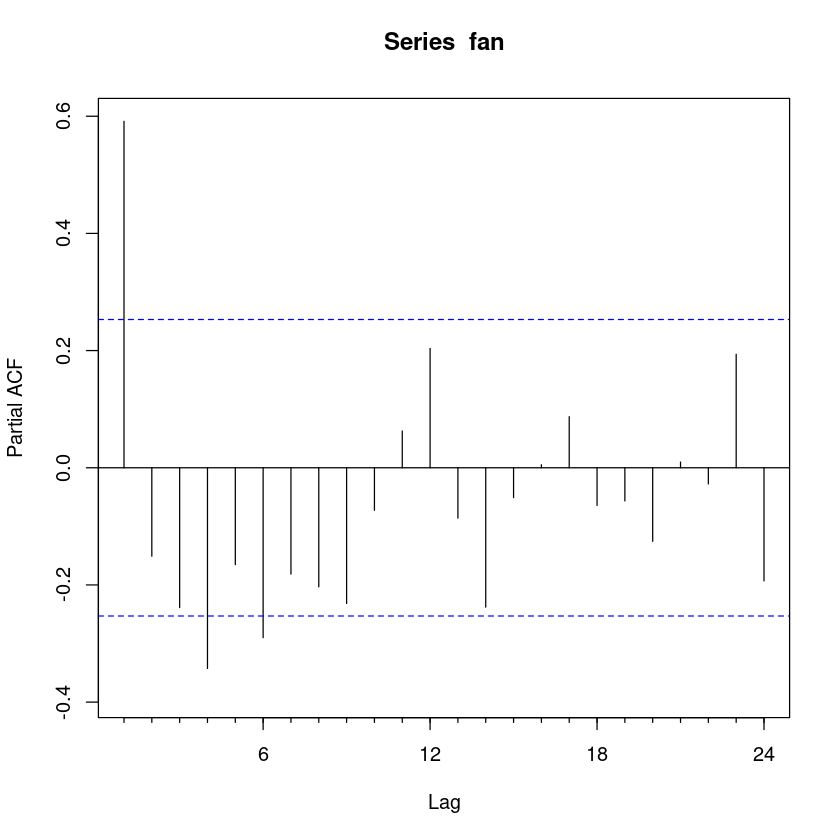

In [10]:
Pacf(fan)

In [11]:
tsoutliers(fan)
fan[13] <- 0.4186132 # 20018-01 

$index
[1] 13

$replacements
[1] 0.4186132

In [12]:
fan.ts <- window(fan, end = c(2020,12))

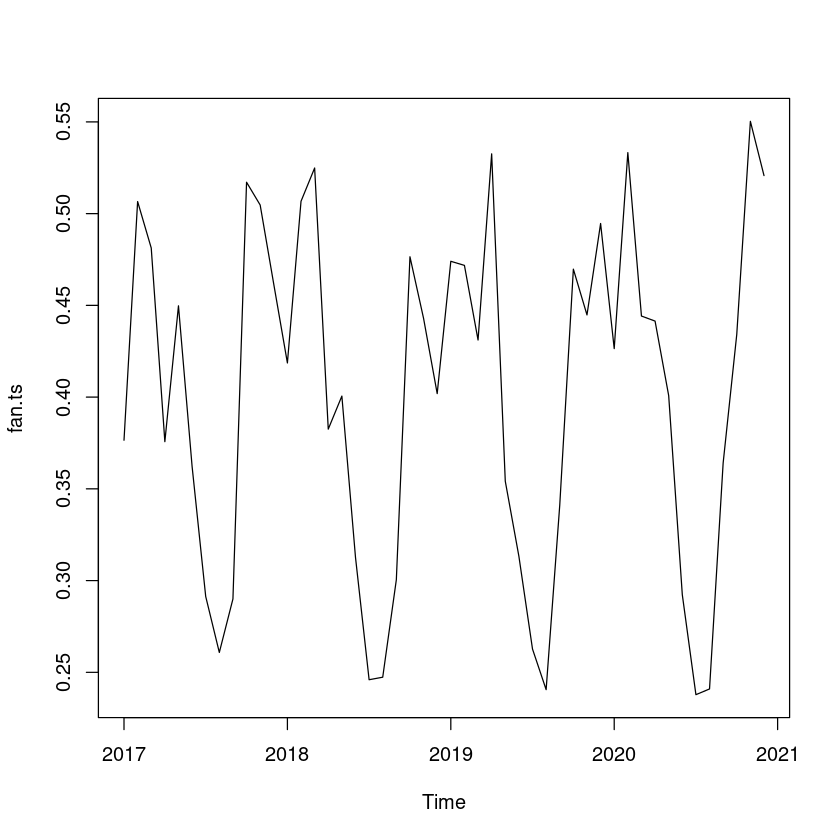

In [13]:
ts.plot(fan.ts)

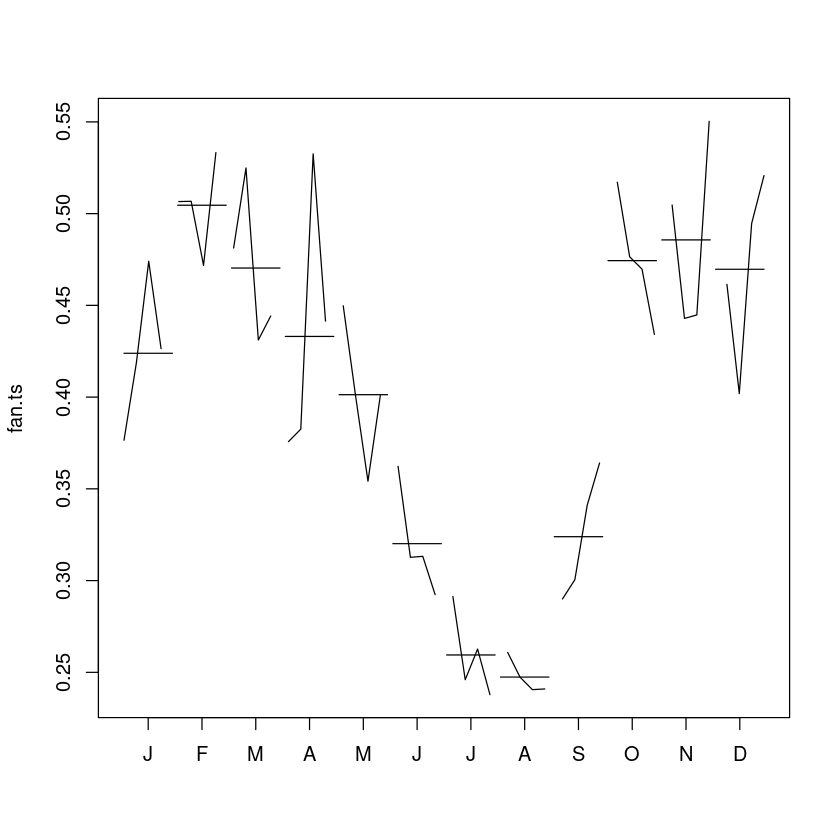

In [14]:
monthplot(fan.ts)

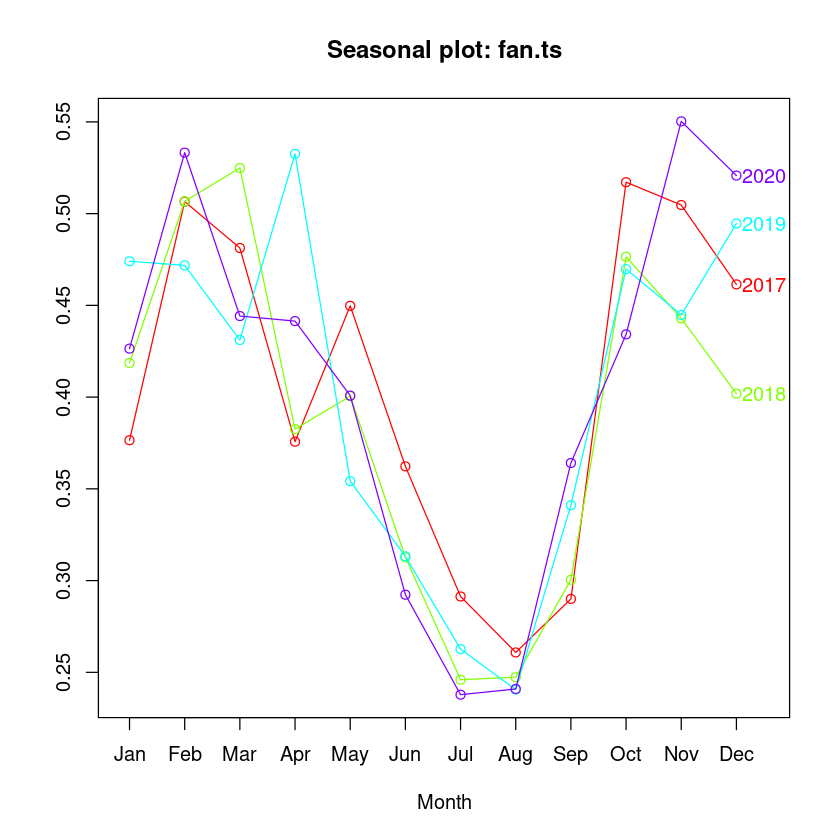

In [15]:
seasonplot(fan.ts, year.labels = T, col = rainbow(4))

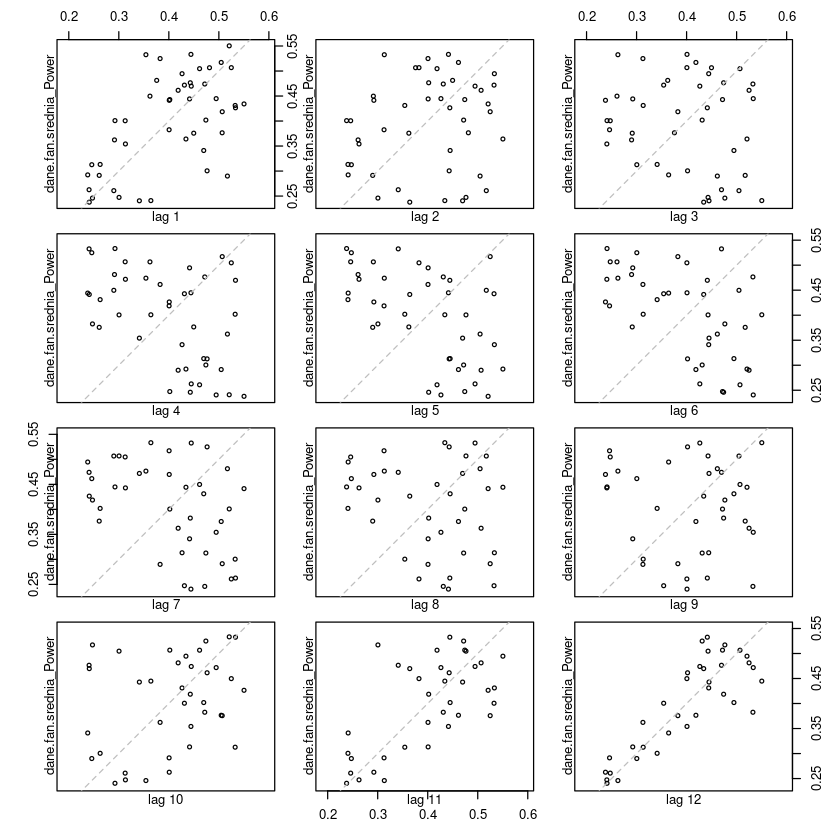

In [16]:
lag.plot(fan.ts, do.lines = F, lags = 12) # there is T i S

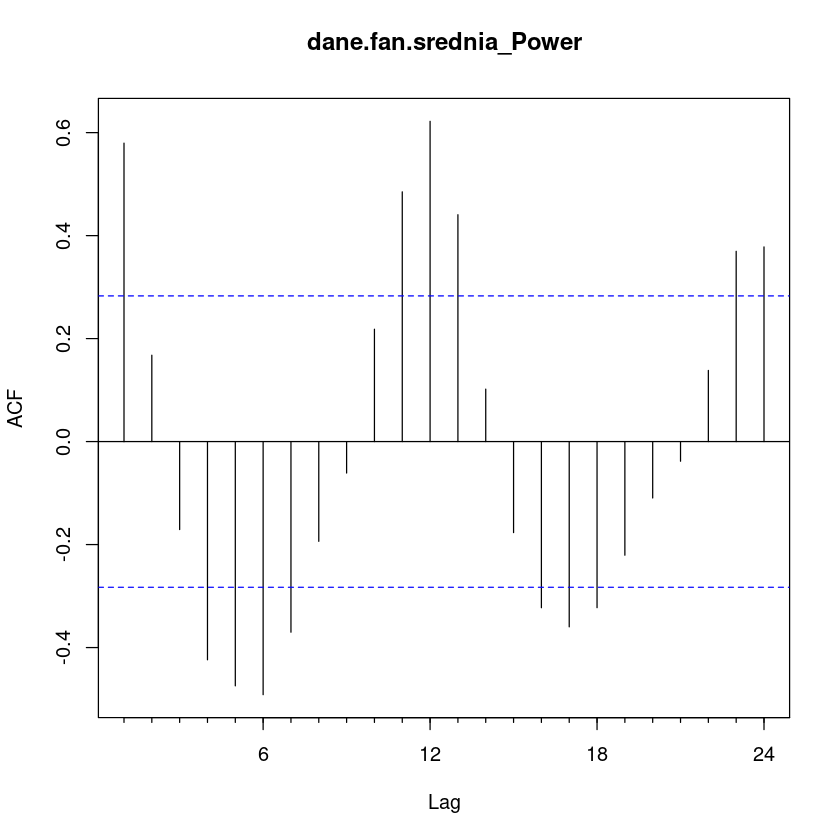

In [17]:

Acf(fan.ts)

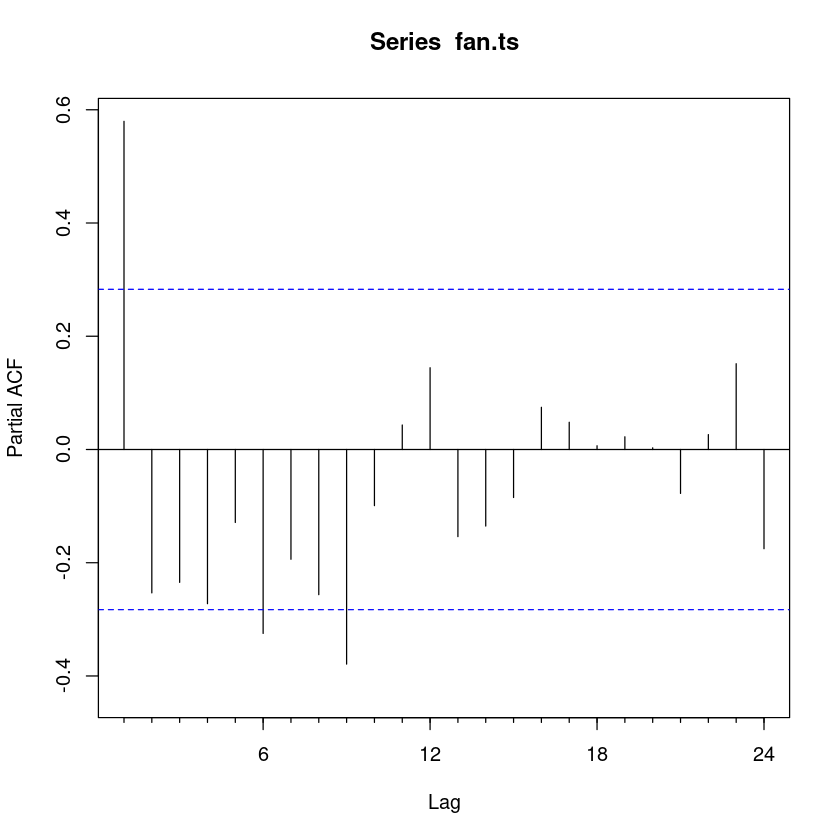

In [18]:

Pacf(fan.ts)

In [19]:
tsoutliers(fan.ts)
fan[28] <- 0.3541302 # 2019-02

$index
[1] 28

$replacements
[1] 0.3541302

In [20]:
fan.test <- window(fan, start = c(2021,1))
tsoutliers(fan.test)
rm(dane,dane.fan,fan)

$index
integer(0)

$replacements
numeric(0)

## Manual differentiation 

In [21]:
fan.ts.diff <- diff(fan.ts, lag = 12)

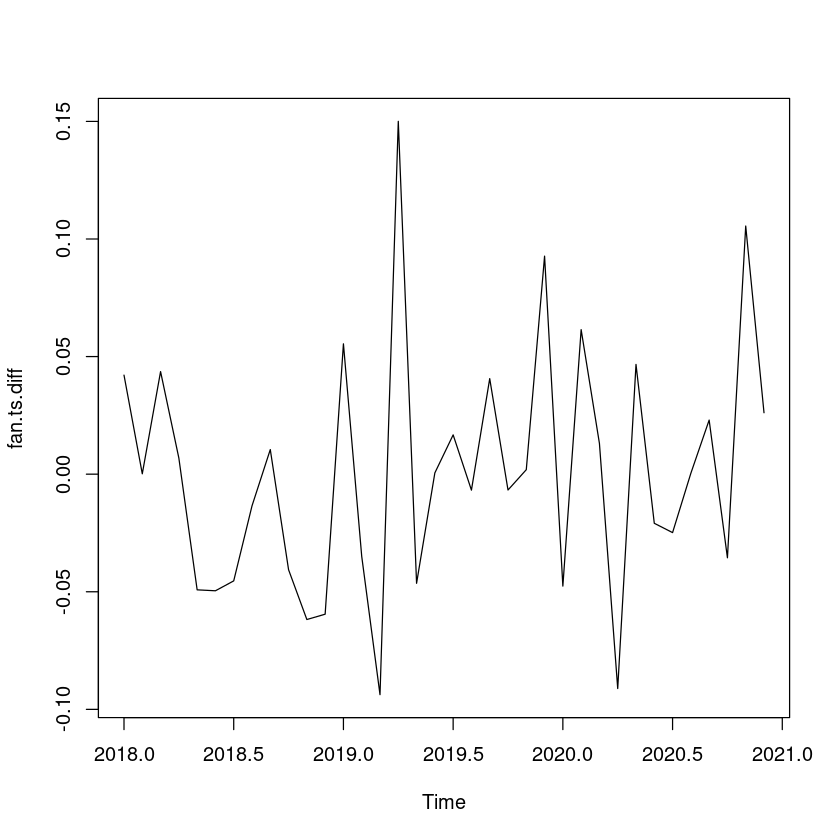

In [22]:
ts.plot(fan.ts.diff)

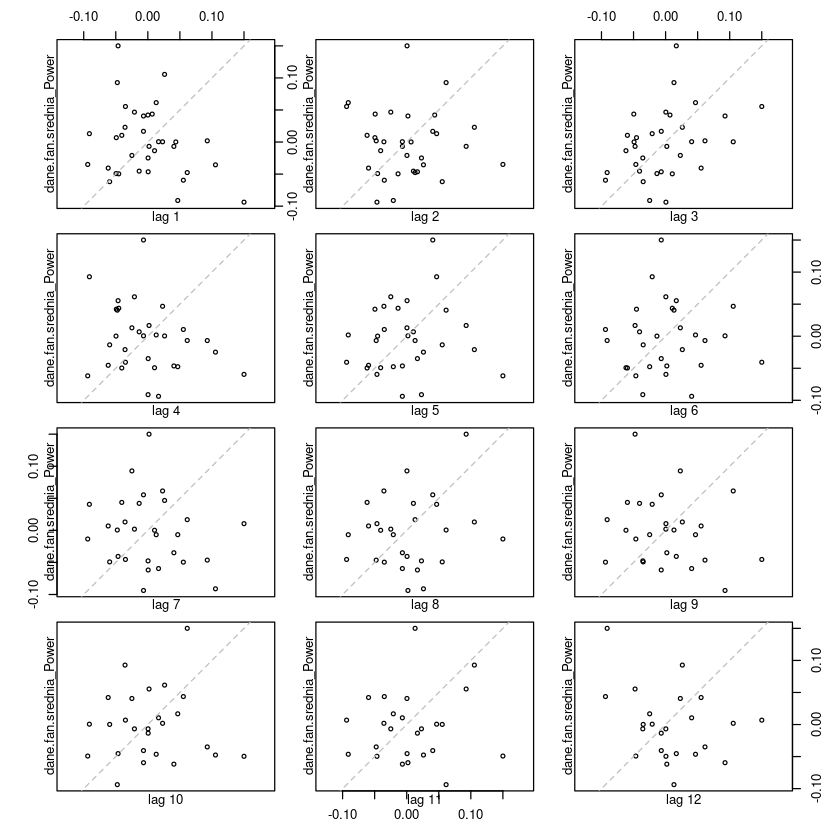

In [23]:
lag.plot(fan.ts.diff, do.lines = F, lags = 12)

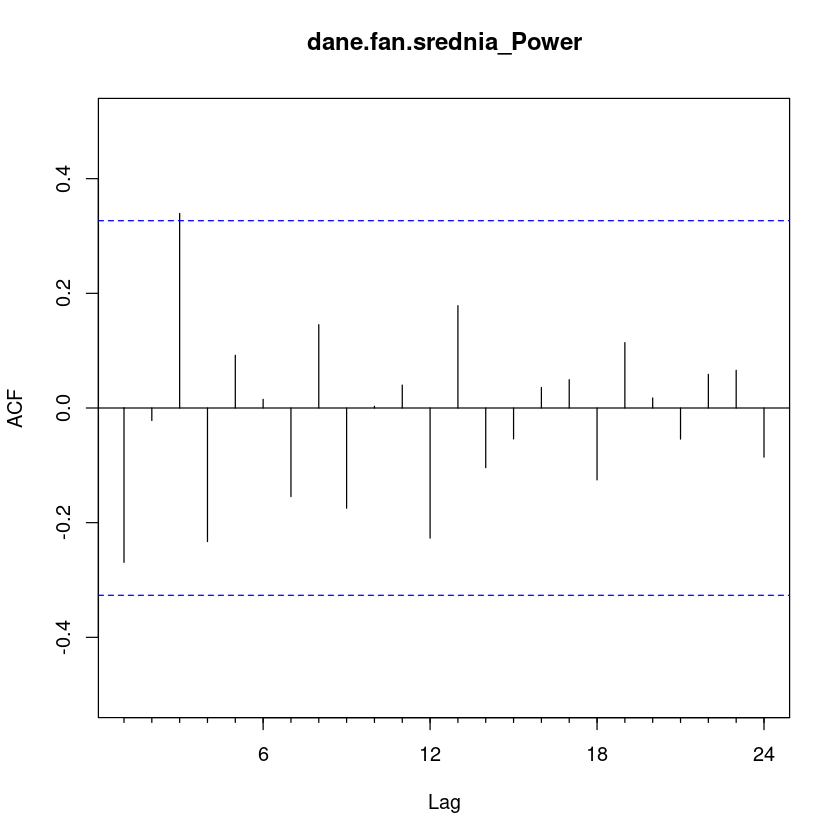

In [24]:
Acf(fan.ts.diff) #MA(3)

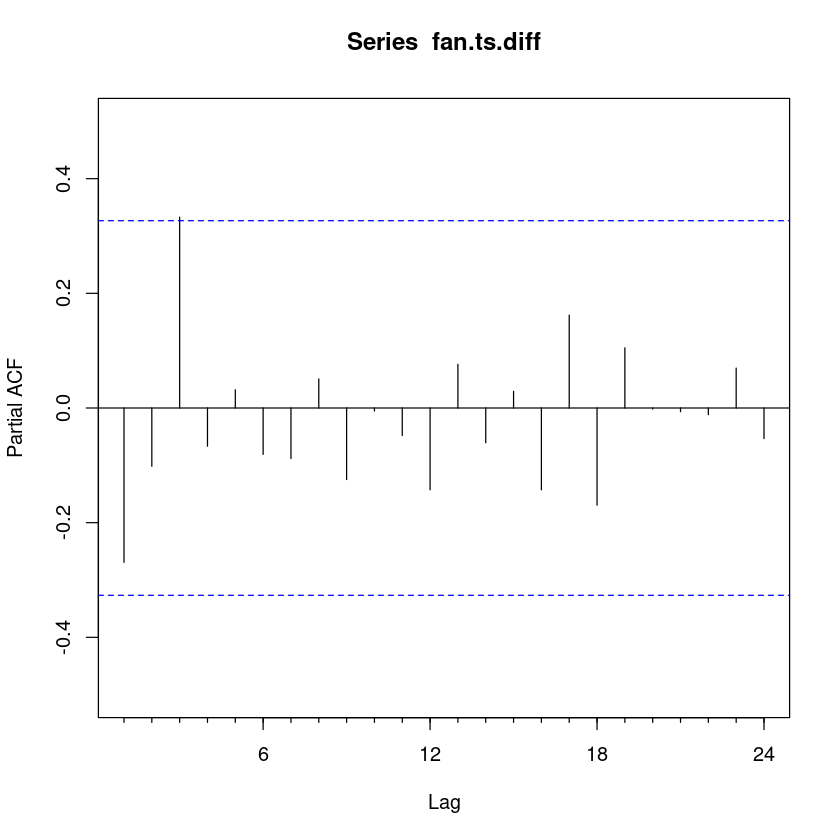

In [25]:
Pacf(fan.ts.diff) #AR(3)

### MA(3)

In [26]:
model.MA3 <- Arima(y =fan.ts, order = c(0,0,3), seasonal = c(0,1,0))
summary(model.MA3)

Series: fan.ts 
ARIMA(0,0,3)(0,1,0)[12] 

Coefficients:
          ma1     ma2     ma3
      -0.1885  0.0539  0.3841
s.e.   0.1728  0.2149  0.2010

sigma^2 = 0.002464:  log likelihood = 58.31
AIC=-108.62   AICc=-107.33   BIC=-102.29

Training set error measures:
                       ME       RMSE        MAE        MPE     MAPE      MASE
Training set 0.0008880666 0.04115437 0.02717207 -0.5168762 6.623249 0.6674529
                    ACF1
Training set -0.07430307

In [27]:
coefs = model.MA3$coef
coefs.sd = sqrt(diag(model.MA3$var.coef))
ind = abs(coefs/(1.96*coefs.sd)) # ratio
signif = which(ind >= 1 )
temp.fixed = numeric(3)
temp.fixed[signif] = NA
model.MA3.signif = Arima( y = fan.ts, order = c(0,0,3), seasonal = c(0,1,0), fixed = temp.fixed )
summary(model.MA3.signif) #No significant coefficients 

Series: fan.ts 
ARIMA(0,0,3)(0,1,0)[12] 

Coefficients:
ma1  ma2  ma3  
  0    0    0  

sigma^2 = 0.002769:  log likelihood = 54.92
AIC=-107.85   AICc=-107.73   BIC=-106.27

Training set error measures:
                       ME       RMSE        MAE       MPE     MAPE      MASE
Training set 0.0002898479 0.04557274 0.03063418 -0.715014 7.344786 0.7524961
                   ACF1
Training set -0.2690897

SARIMA(0,0,0)(0,1,0)[12] model can be done due to the non-significance of the MA(3) coefficient

In [28]:

model.0 <- Arima(fan.ts, order = c(0,0,0), seasonal = c(0,1,0))
summary(model.0)

Series: fan.ts 
ARIMA(0,0,0)(0,1,0)[12] 

sigma^2 = 0.002769:  log likelihood = 54.92
AIC=-107.85   AICc=-107.73   BIC=-106.27

Training set error measures:
                       ME       RMSE        MAE       MPE     MAPE      MASE
Training set 0.0002898479 0.04557274 0.03063418 -0.715014 7.344786 0.7524961
                   ACF1
Training set -0.2690897

In [30]:
prog.model.0 <- forecast(model.0, h = 12)
prog.model.0$mean

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2021,0.4264362,0.5332499,0.4441913,0.4414372,0.4008250,0.2923331,0.2378285,0.2409430,0.3640908,0.4341929,0.5503088,0.5207453


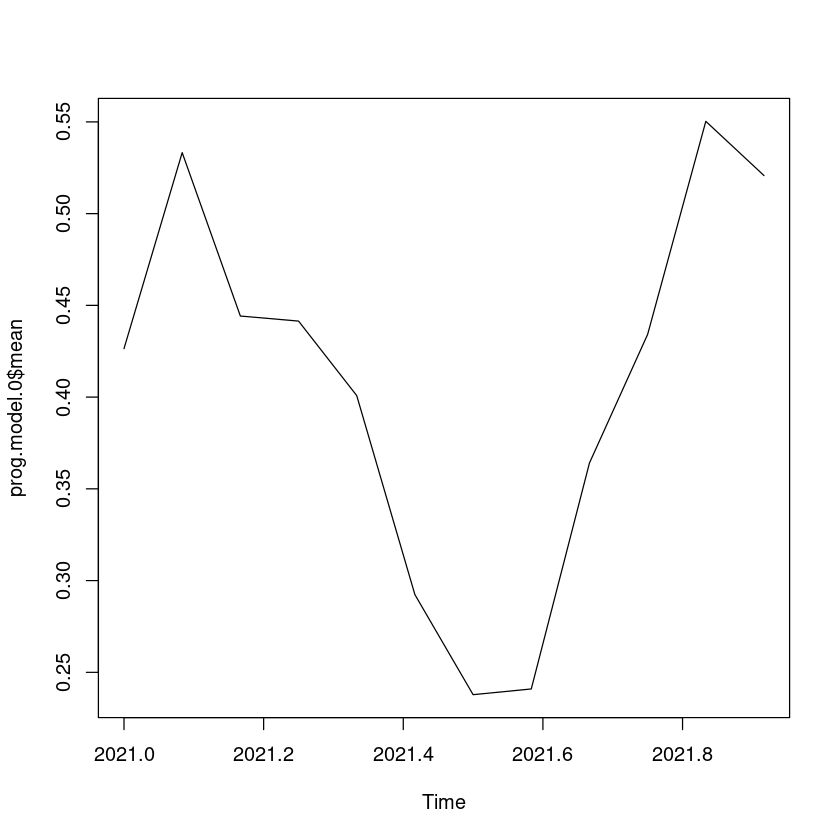

In [31]:
ts.plot(prog.model.0$mean)

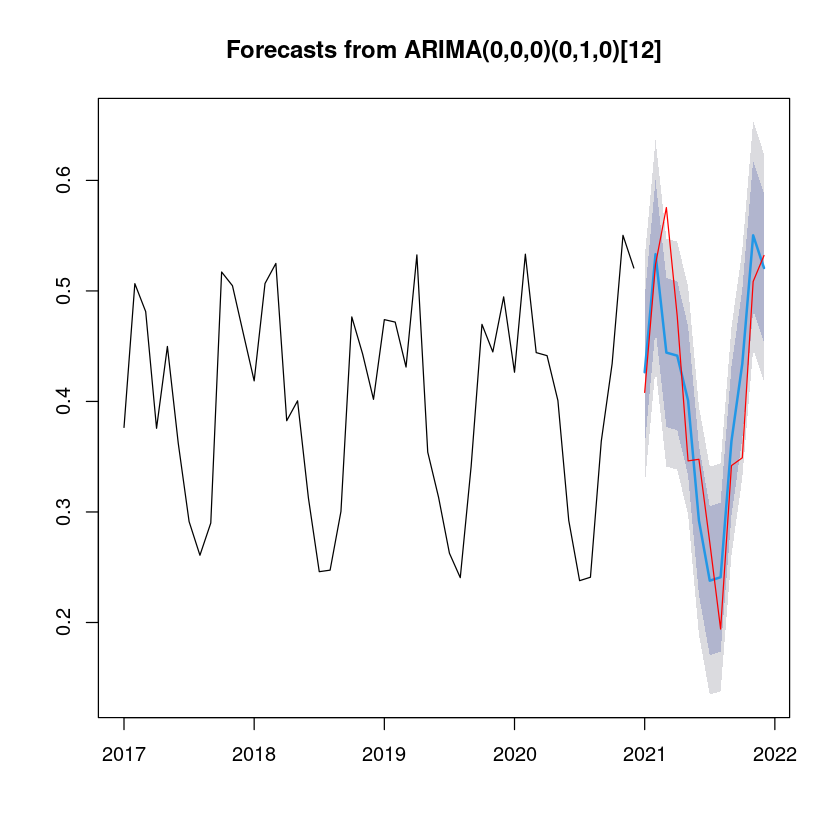

In [34]:
plot(prog.model.0)
lines(fan.test, col = "red")

In [36]:
Acc0 <- accuracy(prog.model.0, fan.test)[,c("ME","MAE","MPE",
                                "MAPE", "RMSE", "Theil's U")]
Acc0

,ME,MAE,MPE,MAPE,RMSE,Theil's U
Training set,0.0002898479,0.03063418,-0.715014,7.344786,0.04557274,NA
Test set,-0.0008173934,0.04553832,-2.017691,12.196325,0.05626707,0.4589184


### AR(3)

In [37]:
model.AR3 <- Arima(fan.ts, order = c(3,0,0), seasonal = c(0,1,0))
summary(model.AR3)

Series: fan.ts 
ARIMA(3,0,0)(0,1,0)[12] 

Coefficients:
          ar1     ar2     ar3
      -0.2558  0.0020  0.3620
s.e.   0.1570  0.1719  0.1628

sigma^2 = 0.002403:  log likelihood = 58.78
AIC=-109.56   AICc=-108.27   BIC=-103.23

Training set error measures:
                       ME       RMSE        MAE        MPE     MAPE      MASE
Training set 0.0007841519 0.04064884 0.02727935 -0.6093401 6.815829 0.6700881
                   ACF1
Training set 0.01099468

In [38]:
coefs = model.AR3$coef
coefs.sd = sqrt(diag(model.AR3$var.coef))
ind = abs(coefs/(1.96*coefs.sd)) # ratio
signif = which(ind >= 1 )
temp.fixed = numeric(3)
temp.fixed[signif] = NA
model.AR3.signif = Arima( y = fan.ts, order = c(3,0,0), seasonal = c(0,1,0), fixed = temp.fixed )
summary(model.AR3.signif) ##significant coefficients: AR(3) 

Series: fan.ts 
ARIMA(3,0,0)(0,1,0)[12] 

Coefficients:
      ar1  ar2     ar3
        0    0  0.3701
s.e.    0    0  0.1597

sigma^2 = 0.002459:  log likelihood = 57.35
AIC=-110.7   AICc=-110.34   BIC=-107.54

Training set error measures:
                       ME       RMSE        MAE        MPE     MAPE      MASE
Training set 0.0008339354 0.04234051 0.02973113 -0.4917162 7.373099 0.7303135
                   ACF1
Training set -0.2460555

Forecast

In [39]:
prog.AR3 <- forecast(model.AR3.signif, h = 12)


In [40]:
prog.AR3$mean

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2021,0.4132743,0.5723039,0.4538598,0.4365654,0.4152807,0.2959118,0.2360252,0.2462938,0.3654155,0.4335254,0.5522893,0.5212356


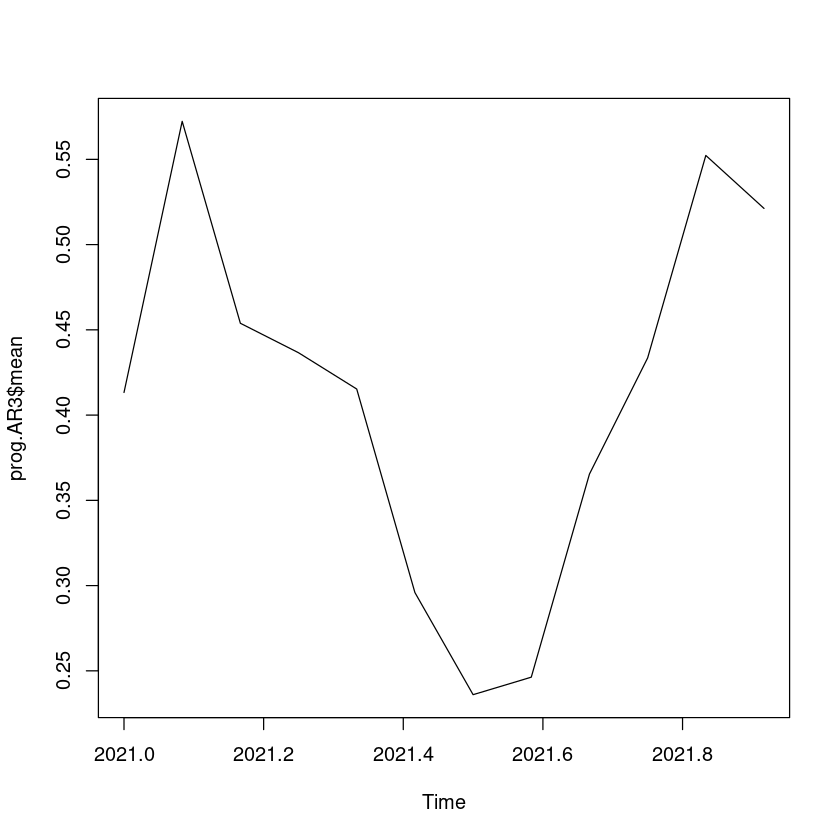

In [41]:
ts.plot(prog.AR3$mean)

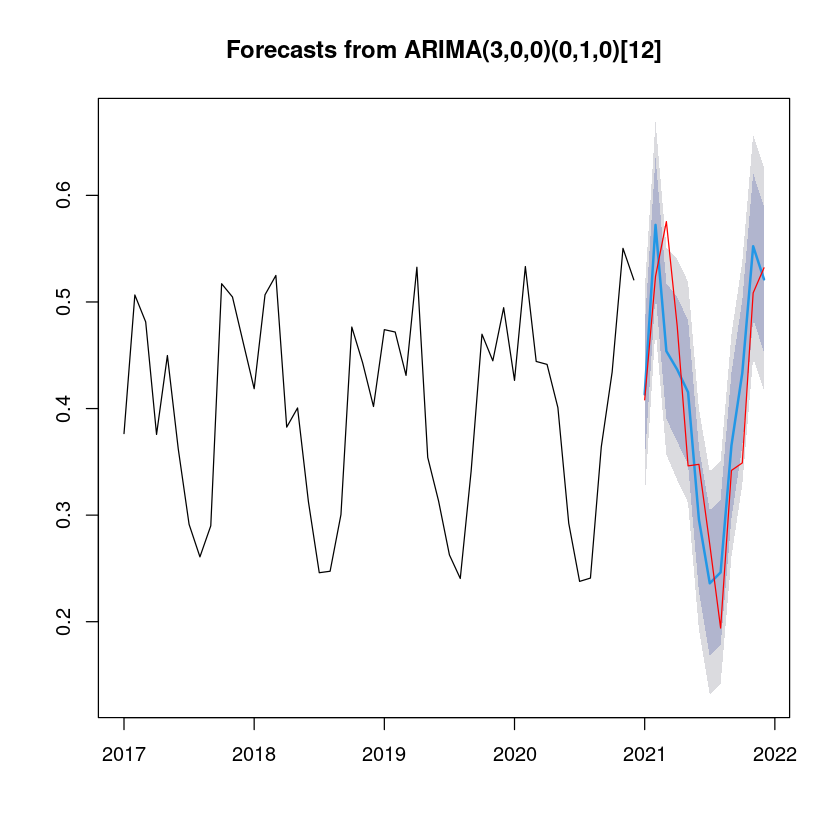

In [42]:
plot(prog.AR3)
lines(fan.test, col = "red")

In [44]:
AccAR3 <- accuracy(prog.AR3, fan.test)[,c("ME","MAE","MPE",
                                          "MAPE", "RMSE", "Theil's U")]
AccAR3

,ME,MAE,MPE,MAPE,RMSE,Theil's U
Training set,0.0008339354,0.02973113,-0.4917162,7.373099,0.04234051,NA
Test set,-0.0054339816,0.04897782,-3.0898511,13.081956,0.05775502,0.4785435


## AutoArima

For comparison the auto.arima was used

In [45]:
fan.ts.auto <- auto.arima(fan.ts)
summary(fan.ts.auto) #ARIMA(0,0,0)(0,1,0)[12]#


Series: fan.ts 
ARIMA(0,0,0)(0,1,0)[12] 

sigma^2 = 0.002769:  log likelihood = 54.92
AIC=-107.85   AICc=-107.73   BIC=-106.27

Training set error measures:
                       ME       RMSE        MAE       MPE     MAPE      MASE
Training set 0.0002898479 0.04557274 0.03063418 -0.715014 7.344786 0.7524961
                   ACF1
Training set -0.2690897

We got ARIMA(0,0,0)(0,1,0)[12] model

Forecast for auto.arima model 

In [46]:
fan.prog.auto <- forecast(fan.ts.auto, h = 12)

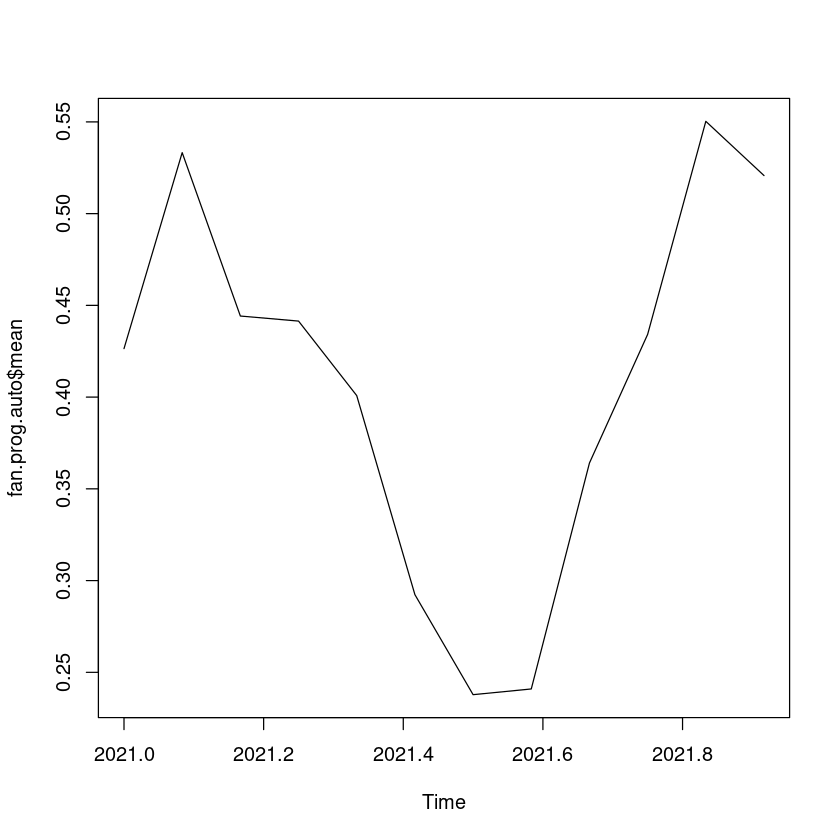

In [47]:
ts.plot(fan.prog.auto$mean)

In [48]:
fan.prog.auto$mean

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2021,0.4264362,0.5332499,0.4441913,0.4414372,0.4008250,0.2923331,0.2378285,0.2409430,0.3640908,0.4341929,0.5503088,0.5207453


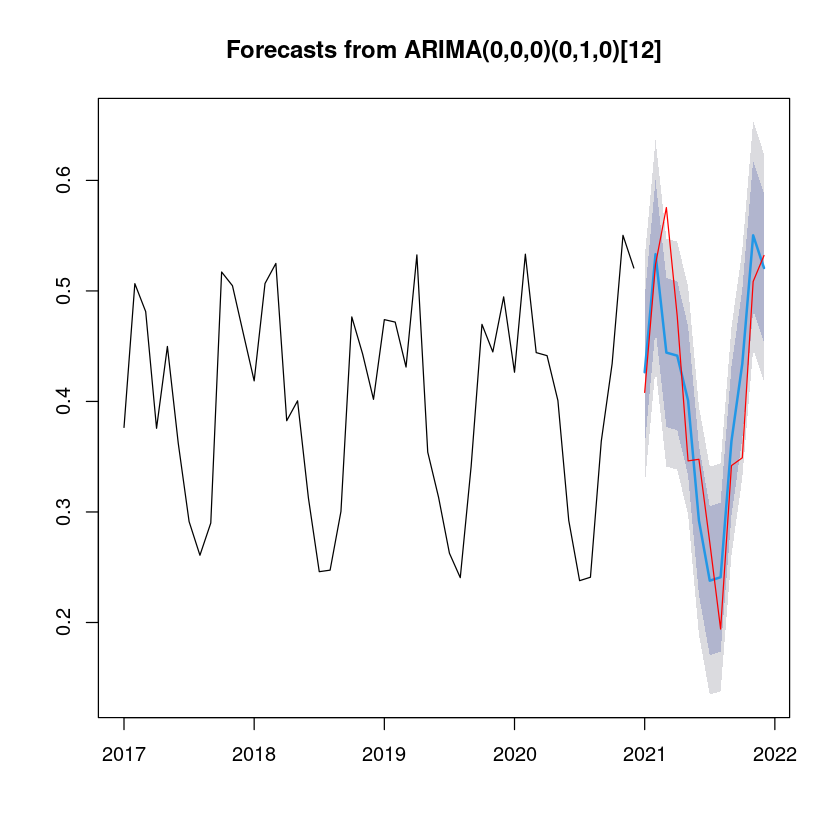

In [49]:
plot(fan.prog.auto)
lines(fan.test, col = "red")

In [50]:
(accuracy(fan.prog.auto, fan.test)[,c("ME","MAE","MPE",
                                     "MAPE", "RMSE", "Theil's U")])


,ME,MAE,MPE,MAPE,RMSE,Theil's U
Training set,0.0002898479,0.03063418,-0.715014,7.344786,0.04557274,NA
Test set,-0.0008173934,0.04553832,-2.017691,12.196325,0.05626707,0.4589184


## Classical decomposition 

In [51]:
fan.decom <- decompose(fan.ts)

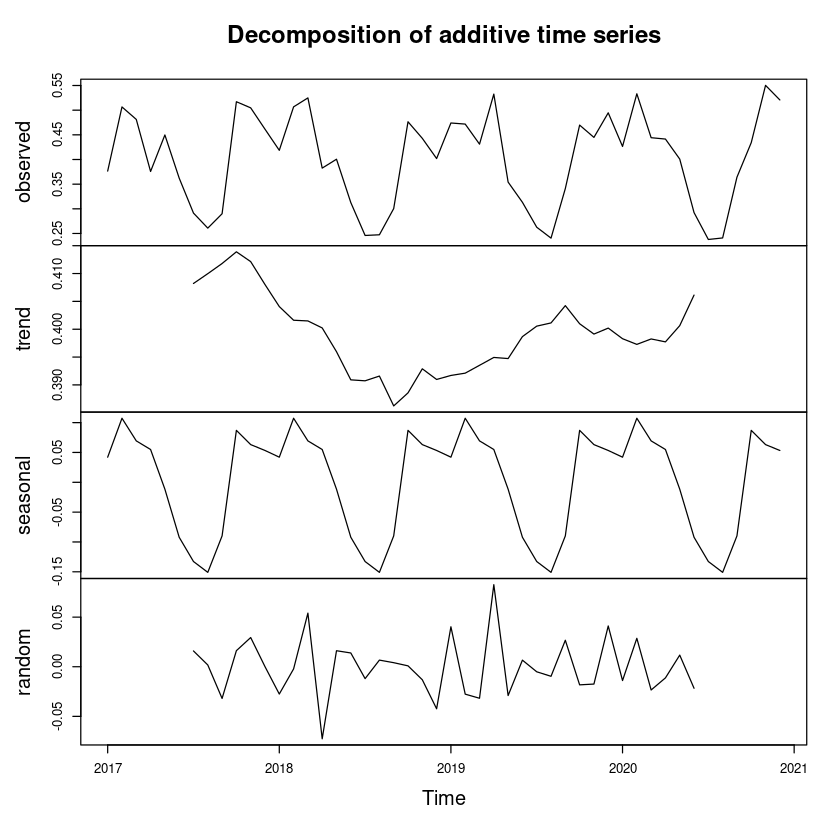

In [52]:
plot(fan.decom)

In [53]:
fan.decom.res <- fan.decom$random

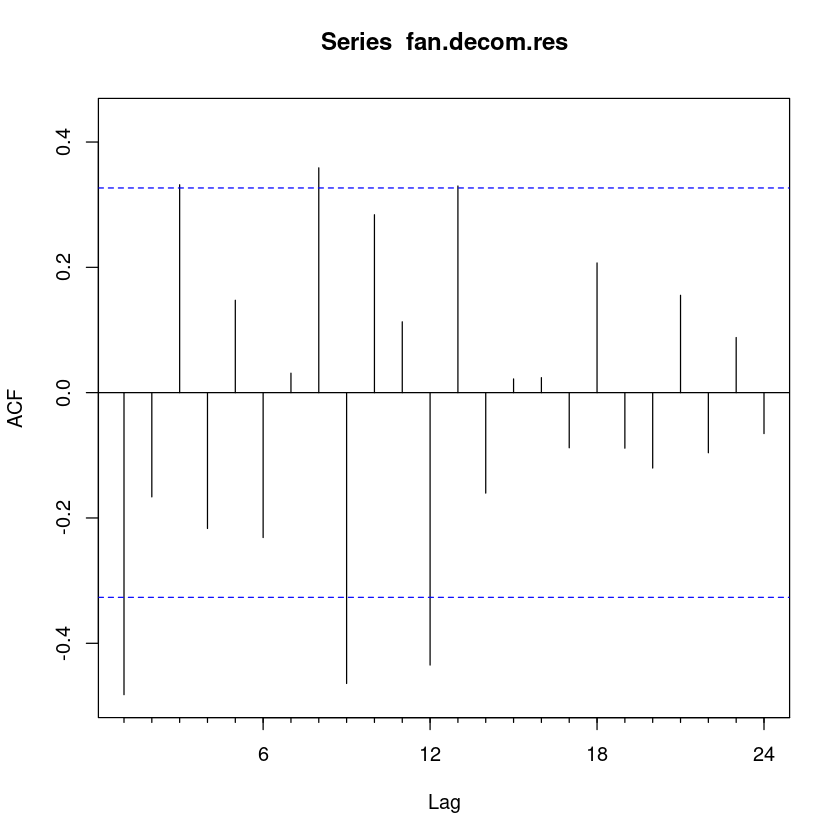

In [54]:
Acf(fan.decom.res) #MA(12)

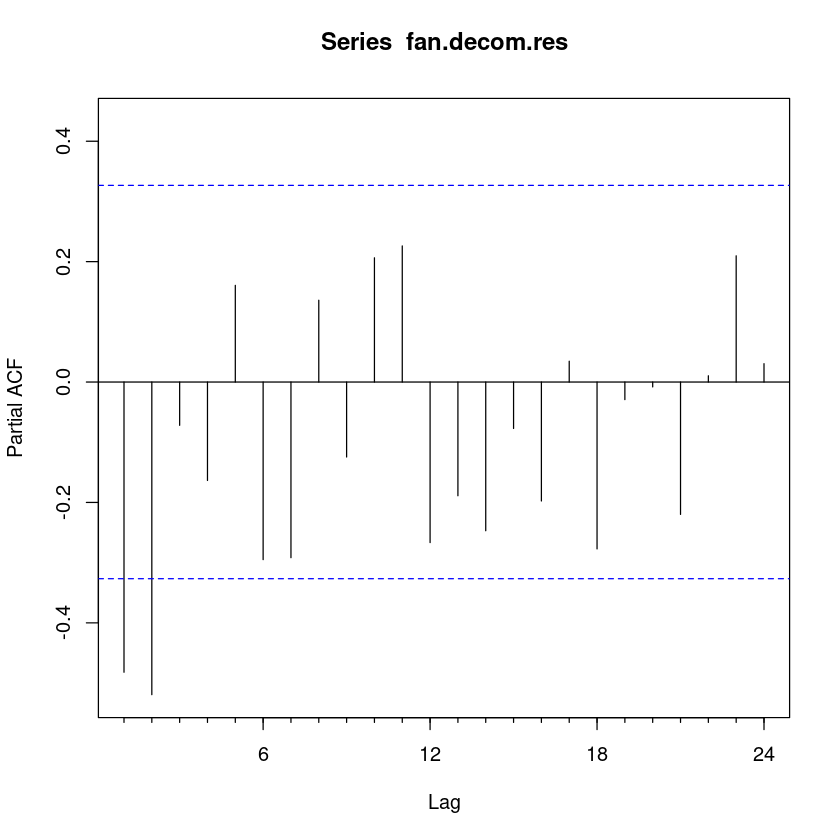

In [55]:
Pacf(fan.decom.res) #AR(2)

### Models for classical decomposition

In [56]:
model.decom.MA12 <- Arima(fan.ts, order = c(0,0,12), seasonal = c(0,1,0))
summary(model.decom.MA12)

Series: fan.ts 
ARIMA(0,0,12)(0,1,0)[12] 

Coefficients:
          ma1      ma2     ma3     ma4     ma5      ma6      ma7     ma8
      -0.0162  -0.1547  0.5318  0.1670  0.0091  -0.1994  -0.0592  0.2289
s.e.   0.5101   0.2937  0.3902  0.3121  0.4678   0.5210   0.4884  0.3369
          ma9     ma10    ma11     ma12
      -0.5186  -0.2587  0.0530  -0.7828
s.e.   0.3873   0.3484  0.4036   0.4879

sigma^2 = 0.001884:  log likelihood = 61.7
AIC=-97.41   AICc=-80.86   BIC=-76.82

Training set error measures:
                       ME      RMSE        MAE        MPE     MAPE      MASE
Training set 0.0007133566 0.0306945 0.02119171 -0.2484794 5.325405 0.5205517
                   ACF1
Training set -0.1487834

In [57]:
model.decom.AR2 <- Arima(fan.ts, order = c(2,0,0), seasonal = c(0,1,0))
summary(model.decom.AR2)

Series: fan.ts 
ARIMA(2,0,0)(0,1,0)[12] 

Coefficients:
          ar1      ar2
      -0.3077  -0.1261
s.e.   0.1681   0.1751

sigma^2 = 0.002673:  log likelihood = 56.53
AIC=-107.07   AICc=-106.32   BIC=-102.32

Training set error measures:
                        ME       RMSE        MAE       MPE     MAPE      MASE
Training set -0.0002139715 0.04351411 0.02971349 -1.020319 7.274233 0.7298802
                   ACF1
Training set 0.03797579

#### MA(12)

In [58]:
coefs = model.decom.MA12$coef
coefs.sd = sqrt(diag(model.decom.MA12$var.coef))
ind = abs(coefs/(1.96*coefs.sd)) # ratio
signif = which(ind >= 1 )
temp.fixed = numeric(12)
temp.fixed[signif] = NA
model.decom.1.signif = Arima( y = fan.ts, order = c(0,0,12), seasonal = c(0,1,0), fixed = temp.fixed )
summary(model.decom.1.signif)# No significant coefficients

Series: fan.ts 
ARIMA(0,0,12)(0,1,0)[12] 

Coefficients:
 ma1   ma2   ma3   ma4   ma5   ma6   ma7   ma8   ma9  ma10  ma11  ma12  
   0     0     0     0     0     0     0     0     0     0     0     0  

sigma^2 = 0.002769:  log likelihood = 54.92
AIC=-107.85   AICc=-107.73   BIC=-106.27

Training set error measures:
                       ME       RMSE        MAE       MPE     MAPE      MASE
Training set 0.0002898479 0.04557274 0.03063418 -0.715014 7.344786 0.7524961
                   ACF1
Training set -0.2690897

model Identical to  SARIMA(0,0,0)(0,1,0)

#### AR(2)

In [59]:

#AR(2)
coefs = model.decom.AR2$coef
coefs.sd = sqrt(diag(model.decom.AR2$var.coef))
ind = abs(coefs/(1.96*coefs.sd)) # ratio
signif = which(ind >= 1 )
temp.fixed = numeric(2)
temp.fixed[signif] = NA
model.decom.2.signif = Arima( y = fan.ts, order = c(2,0,0), seasonal = c(0,1,0), fixed = temp.fixed )
summary(model.decom.2.signif)# No significant coefficients

Series: fan.ts 
ARIMA(2,0,0)(0,1,0)[12] 

Coefficients:
ar1  ar2  
  0    0  

sigma^2 = 0.002769:  log likelihood = 54.92
AIC=-107.85   AICc=-107.73   BIC=-106.27

Training set error measures:
                       ME       RMSE        MAE       MPE     MAPE      MASE
Training set 0.0002898479 0.04557274 0.03063418 -0.715014 7.344786 0.7524961
                   ACF1
Training set -0.2690897

model Identical to  SARIMA(0,0,0)(0,1,0)

## TSLM

tslm can be done for comparison but after the classical decomposition you can see that the trend is not linear

In [60]:
fan.tslm <- tslm(fan.ts ~ trend + season)
fan.tslm.res <- fan.tslm$residuals

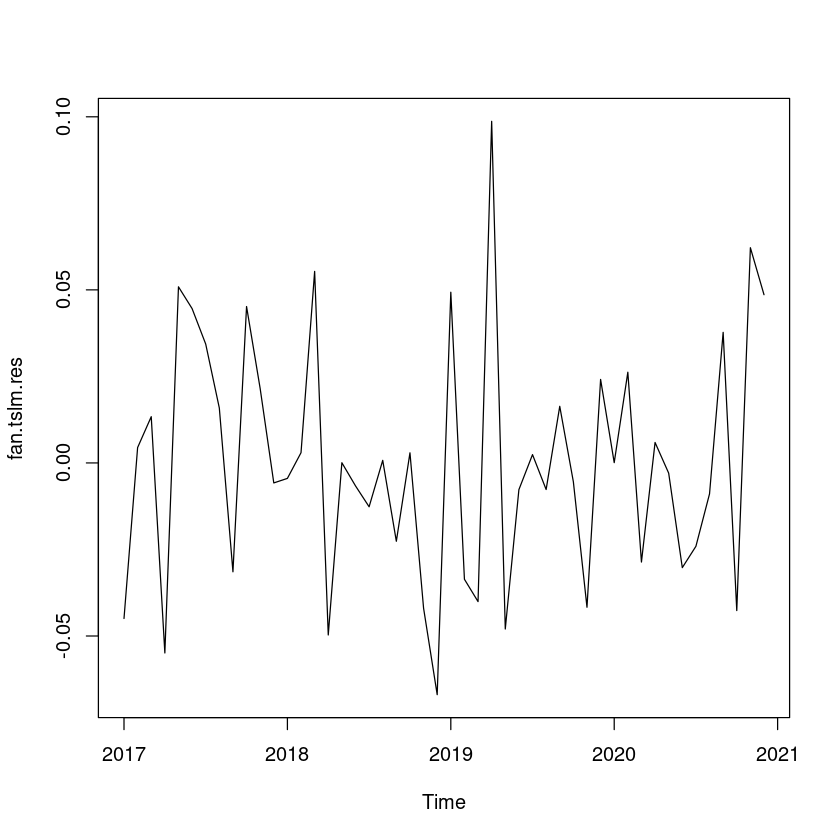

In [61]:
ts.plot(fan.tslm.res)

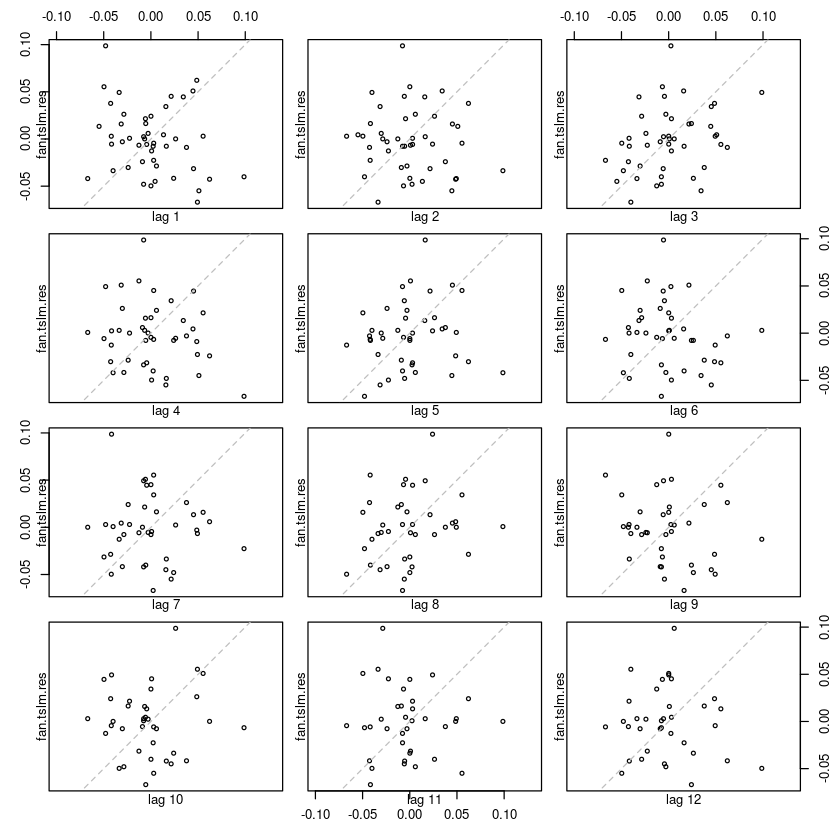

In [62]:
lag.plot(fan.tslm.res, do.lines = F, lags = 12)

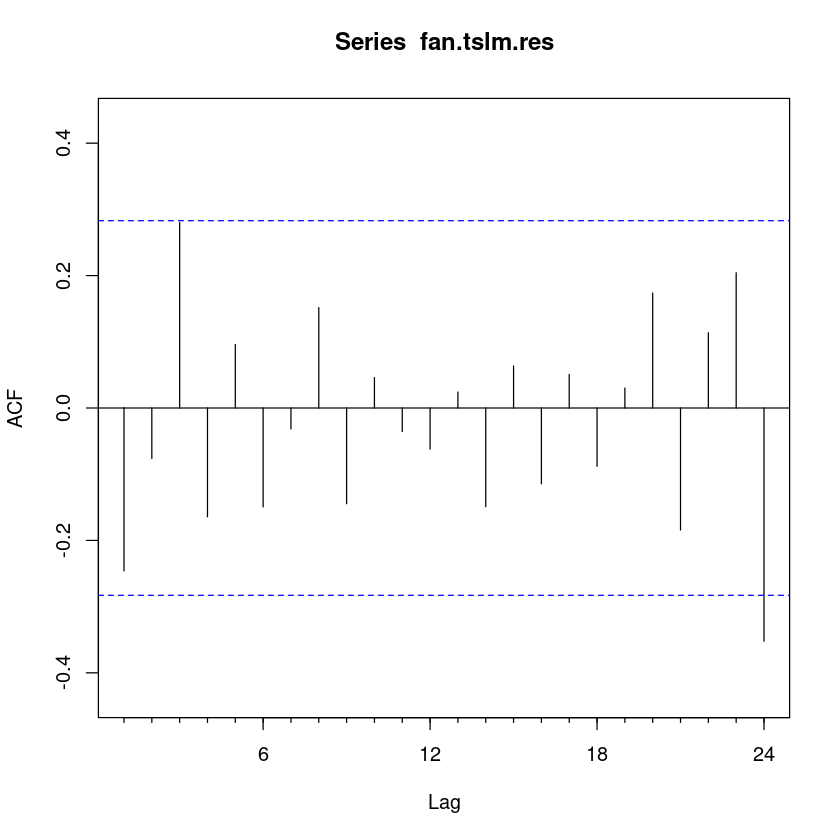

In [63]:
Acf(fan.tslm.res)#MA24

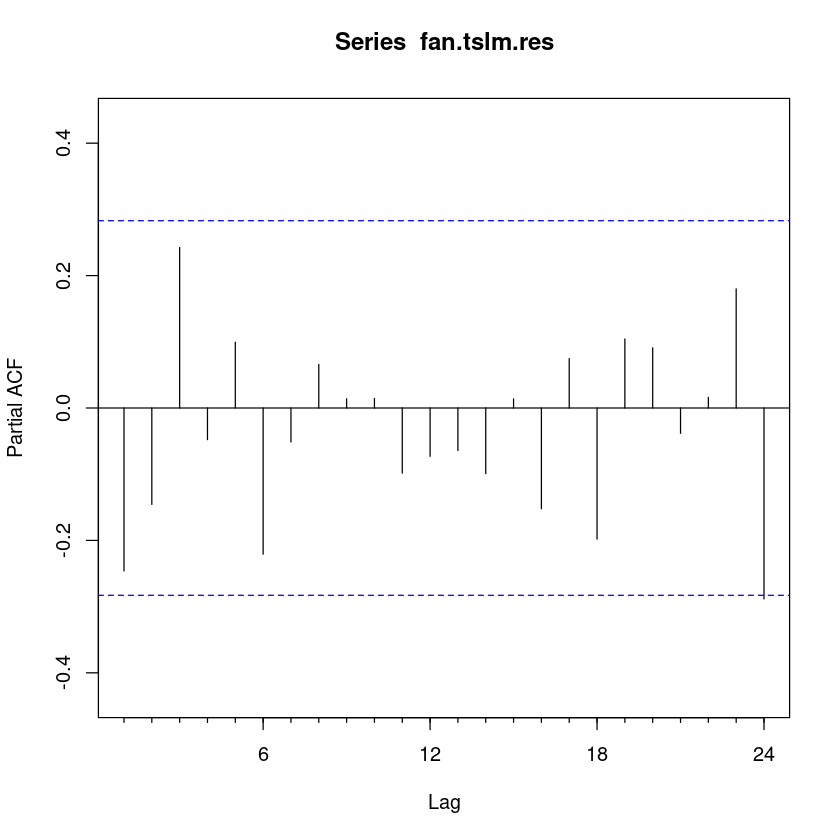

In [64]:
Pacf(fan.tslm.res)

In [65]:
prog.tslm <- forecast(fan.tslm, h = 12)

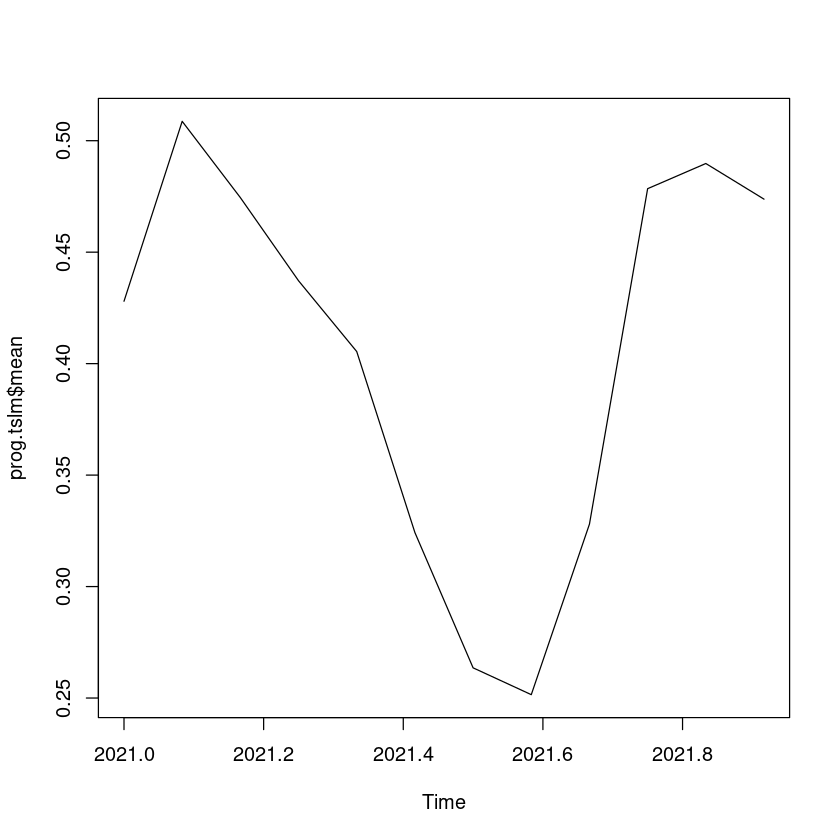

In [66]:
ts.plot(prog.tslm$mean)

differentiating tslm due to uncertainty in lag plot result #1 vs. trend 

In [67]:
fan.tslm.diff <- diff(fan.tslm.res)

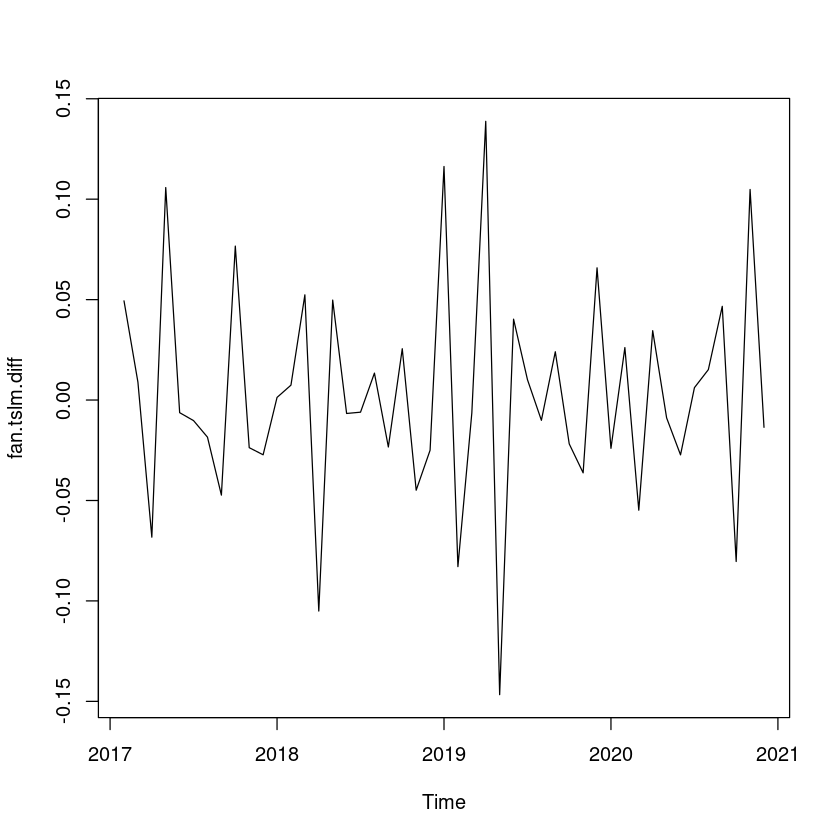

In [68]:
ts.plot(fan.tslm.diff)

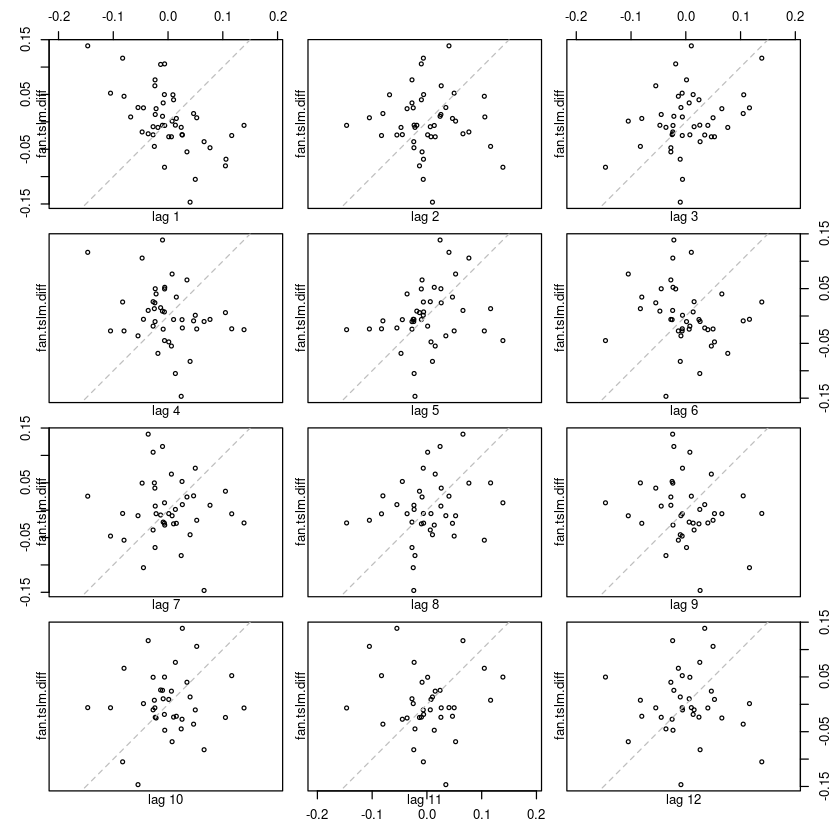

In [69]:
lag.plot(fan.tslm.diff, do.lines = F, lags = 12)

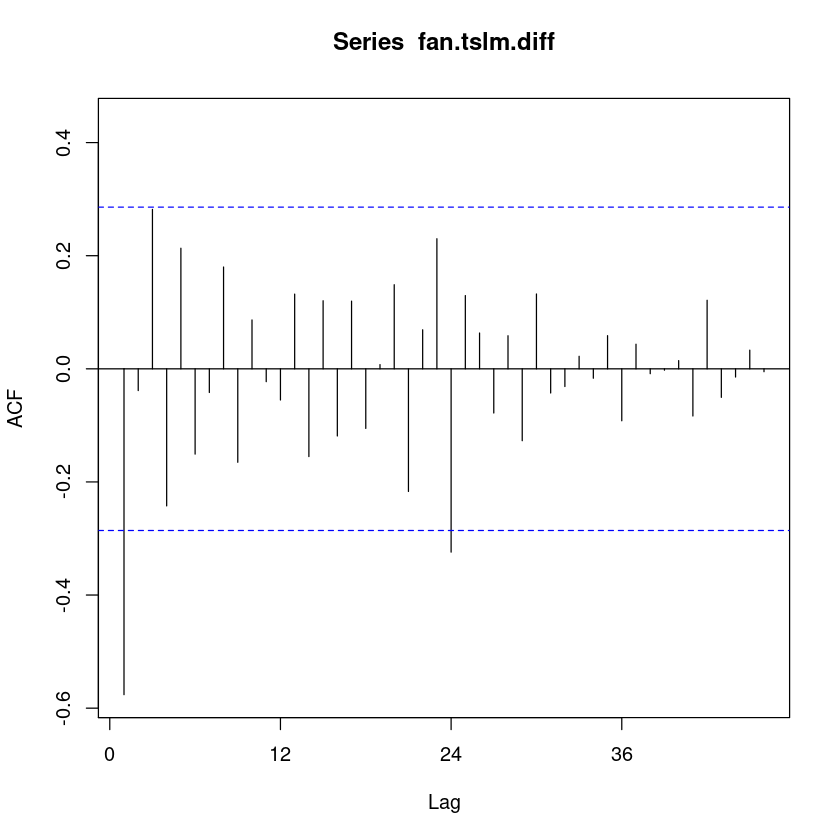

In [70]:
Acf(fan.tslm.diff, lag=60) # MA(1)

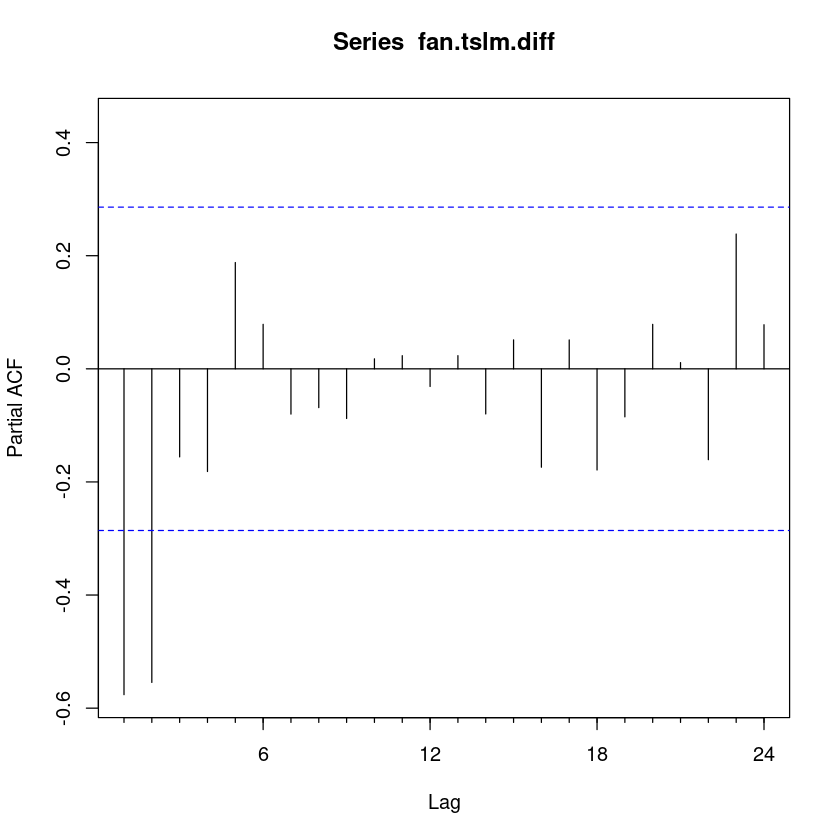

In [71]:
Pacf(fan.tslm.diff) # AR(2)

### MA(1)

In [72]:
model.res.MA1 = Arima(fan.tslm.res, order = c(0,1,1), seasonal = c(0,0,0))
summary(model.res.MA1)

Series: fan.tslm.res 
ARIMA(0,1,1) 

Coefficients:
          ma1
      -1.0000
s.e.   0.0666

sigma^2 = 0.001301:  log likelihood = 88.03
AIC=-172.06   AICc=-171.79   BIC=-168.36

Training set error measures:
                      ME       RMSE        MAE       MPE     MAPE      MASE
Training set 0.001065323 0.03530877 0.02789186 -84.97677 367.9081 0.6830878
                   ACF1
Training set -0.2181161

In [73]:
coefs.tslm = model.res.MA1$coef
coefs.sd.1 = sqrt(diag(model.res.MA1$var.coef))
ind = abs(coefs.tslm/(1.96*coefs.sd.1)) # |ratio| 
signif.tsml = which(ind >=1)
temp.fixed = numeric(1)
temp.fixed[signif.tsml] = NA
model.res.MA1.signif = Arima(fan.tslm.res, order = c(0,1,1), seasonal = c(0,0,0), fixed = temp.fixed)
summary(model.res.MA1.signif)
prognoza.tslm.MA1 = forecast(model.res.MA1.signif, h = 12) # Forcast for MA(1)

Series: fan.tslm.res 
ARIMA(0,1,1) 

Coefficients:
          ma1
      -1.0000
s.e.   0.0666

sigma^2 = 0.001301:  log likelihood = 88.03
AIC=-172.06   AICc=-171.79   BIC=-168.36

Training set error measures:
                      ME       RMSE        MAE       MPE     MAPE      MASE
Training set 0.001065323 0.03530877 0.02789186 -84.97677 367.9081 0.6830878
                   ACF1
Training set -0.2181161

### Forecast T + S + MA(1)

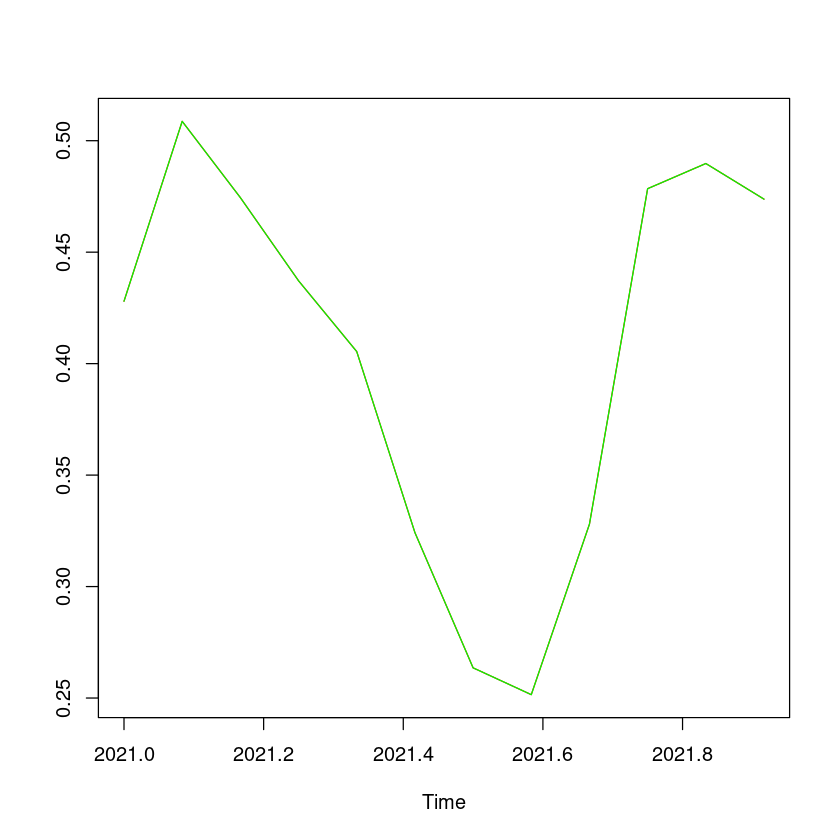

In [74]:

prognoza.tslm.arima.MA1 = prog.tslm$mean + prognoza.tslm.MA1$mean
ts.plot(prog.tslm$mean, prognoza.tslm.arima.MA1, col = c("red","green"))
AcctslmMA1<- accuracy(prognoza.tslm.arima.MA1, fan.test)[,c("ME","MAE","MPE",
                                          "MAPE", "RMSE", "Theil's U")]

### AR(2)

In [75]:
model.res.AR2 = Arima(fan.tslm.res, order = c(2,1,0), seasonal = c(0,0,0))
summary(model.res.AR2)

Series: fan.tslm.res 
ARIMA(2,1,0) 

Coefficients:
          ar1      ar2
      -0.9346  -0.6129
s.e.   0.1180   0.1190

sigma^2 = 0.001368:  log likelihood = 88.62
AIC=-171.25   AICc=-170.69   BIC=-165.7

Training set error measures:
                      ME       RMSE        MAE      MPE     MAPE      MASE
Training set 0.003167126 0.03581197 0.02953898 -152.604 1162.302 0.7234268
                    ACF1
Training set -0.09941581

In [76]:
coefs.tslm = model.res.AR2$coef
coefs.sd.1 = sqrt(diag(model.res.AR2$var.coef))
ind = abs(coefs.tslm/(1.96*coefs.sd.1)) # |ratio| 
signif.tsml = which(ind >=1)
temp.fixed = numeric(2)
temp.fixed[signif.tsml] = NA
model.res.AR2.signif = Arima(fan.tslm.res, order = c(2,1,0), seasonal = c(0,0,0), fixed = temp.fixed)
summary(model.res.AR2.signif)
prognoza.tslm.AR2 = forecast(model.res.AR2.signif, h = 12) # Forecast for AR(2)

Series: fan.tslm.res 
ARIMA(2,1,0) 

Coefficients:
          ar1      ar2
      -0.9346  -0.6129
s.e.   0.1180   0.1190

sigma^2 = 0.001368:  log likelihood = 88.62
AIC=-171.25   AICc=-170.69   BIC=-165.7

Training set error measures:
                      ME       RMSE        MAE      MPE     MAPE      MASE
Training set 0.003167126 0.03581197 0.02953898 -152.604 1162.302 0.7234268
                    ACF1
Training set -0.09941581

### Forecast T + S + AR(2)

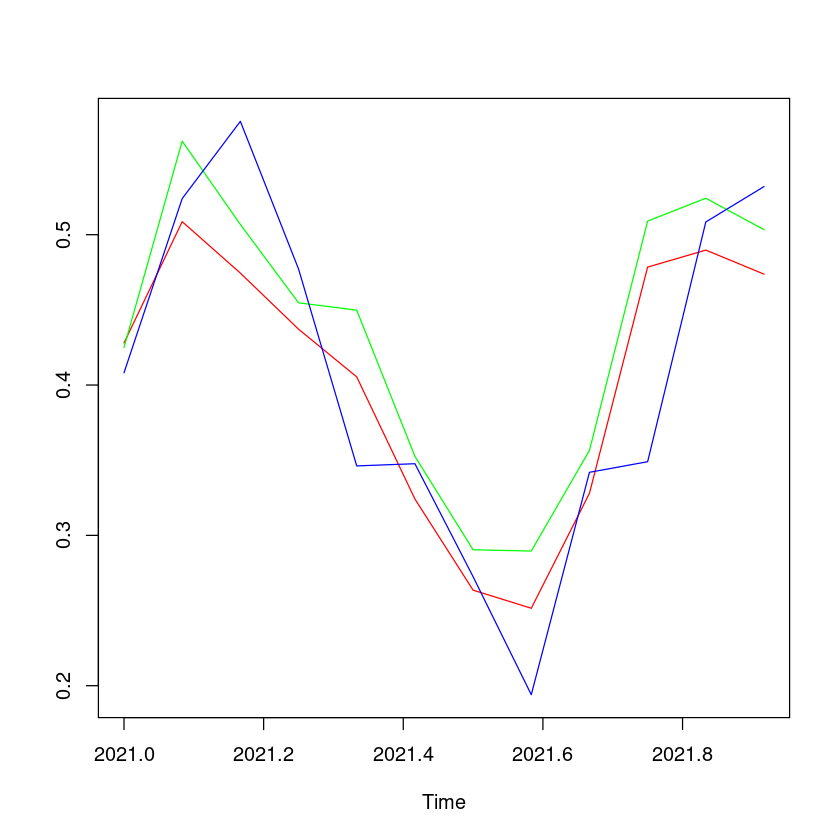

In [77]:
prognoza.tslm.arima.AR2 = prog.tslm$mean + prognoza.tslm.AR2$mean
ts.plot(prog.tslm$mean, prognoza.tslm.arima.AR2,fan.test, col = c("red","green","blue"))
AcctslmAR2 <- accuracy(prognoza.tslm.arima.AR2, fan.test)[,c("ME","MAE","MPE",
                                               "MAPE", "RMSE", "Theil's U")]


## Holt-Winters Metode 

In [78]:
prog.hw <- hw(fan.ts, h = 12)

In [79]:
summary(prog.hw)


Forecast method: Holt-Winters' additive method

Model Information:
Holt-Winters' additive method 

Call:
 hw(y = fan.ts, h = 12) 

  Smoothing parameters:
    alpha = 0.0092 
    beta  = 0.0092 
    gamma = 1e-04 

  Initial states:
    l = 0.4068 
    b = -0.0012 
    s = 0.0685 0.0889 0.0752 -0.0763 -0.1525 -0.1431
           -0.0818 -0.0014 0.0325 0.0704 0.0989 0.0207

  sigma:  0.0444

      AIC      AICc       BIC 
-98.61202 -78.21202 -66.80161 

Error measures:
                      ME       RMSE        MAE       MPE     MAPE      MASE
Training set 0.005984291 0.03626233 0.02821841 0.8986914 6.840863 0.6931553
                   ACF1
Training set -0.2502211

Forecasts:
         Point Forecast     Lo 80     Hi 80     Lo 95     Hi 95
Jan 2021      0.4225948 0.3656784 0.4795112 0.3355487 0.5096409
Feb 2021      0.5023445 0.4454184 0.5592705 0.4152835 0.5894054
Mar 2021      0.4752207 0.4182729 0.5321685 0.3881266 0.5623149
Apr 2021      0.4388500 0.3818636 0.4958365 0.3516968 0.526

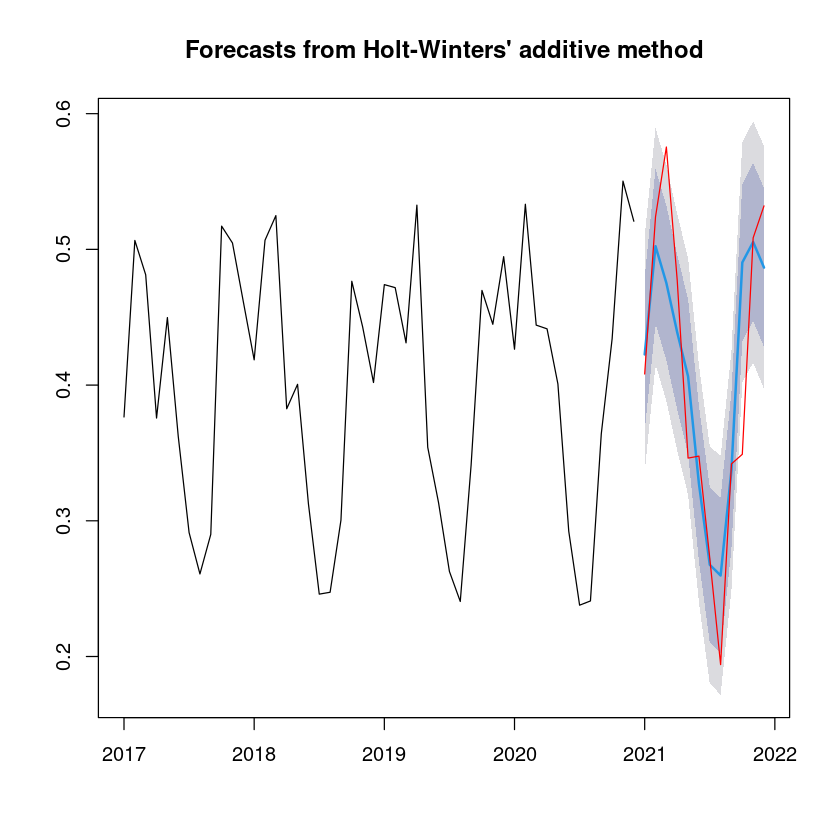

In [80]:
plot(prog.hw)
lines(fan.test, col = "red")

In [81]:
(AccHW <- accuracy(prog.hw, fan.test)[,c("ME","MAE","MPE",
                               "MAPE", "RMSE", "Theil's U")])

,ME,MAE,MPE,MAPE,RMSE,Theil's U
Training set,0.005984291,0.02821841,0.8986914,6.840863,0.03626233,NA
Test set,-0.003591124,0.04333658,-3.9618089,11.911302,0.05959891,0.5189692


## Forecast Plot

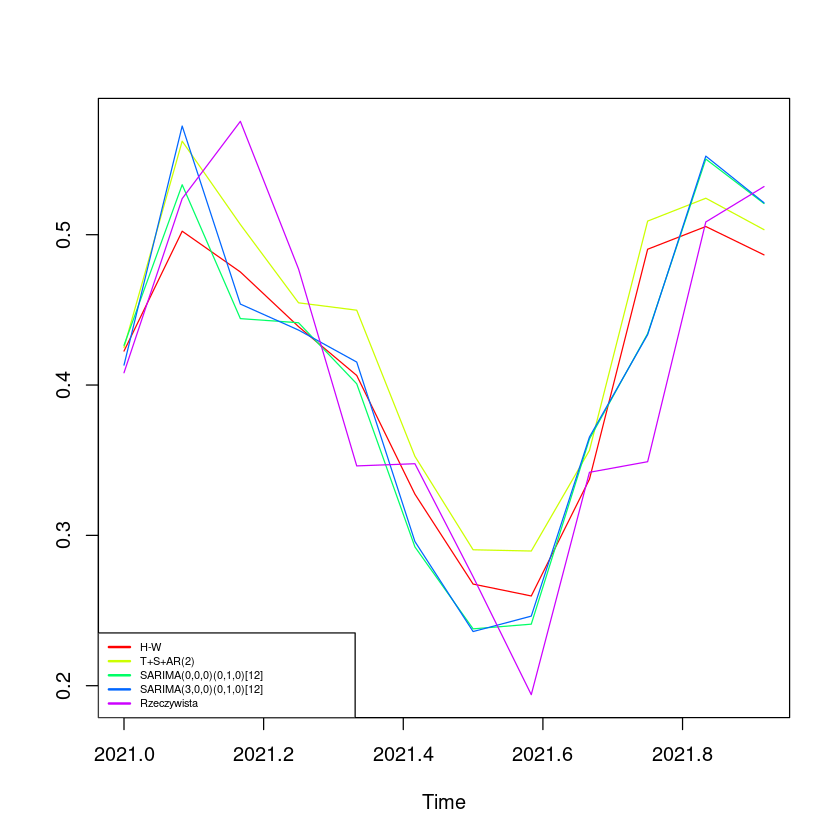

In [82]:

ts.plot(prog.hw$mean,prognoza.tslm.arima.AR2,
        prog.model.0$mean, prog.AR3$mean,fan.test,
     col = rainbow(5))
legend("bottomleft",lwd = 2, text.width = 0.3, cex = 0.55,
       legend = c("H-W", "T+S+AR(2)", "SARIMA(0,0,0)(0,1,0)[12]"
                  ,"SARIMA(3,0,0)(0,1,0)[12]","Rzeczywista"), col = rainbow(5))

## AIC, AICc, BIC comparison

In [83]:
models <- list(
  Arima = model.0,
  AR3 = model.AR3.signif,
  tslmAR2 = model.res.AR2.signif
)


get_ic_values <- function(model) {
  return(c(model$aic, model$aicc, model$bic))
}


results_df <- data.frame(Model = names(models), matrix(NA, nrow = length(models), ncol = 3))
colnames(results_df)[2:4] <- c("AIC", "AICc", "BIC")

for (i in seq_along(models)) {
  results_df[i, 2:4] <- get_ic_values(models[[i]])
}
results_df[4,c("Model","AIC","AICc","BIC")] <- c("HW",-98.61202, -78.21202, -66.80161)
print(results_df)

    Model               AIC              AICc               BIC
1   Arima -107.848696780634  -107.73104972181 -106.265177842177
2     AR3 -110.703471568269 -110.339835204633 -107.536433691357
3 tslmAR2  -171.24959747832 -170.691457943436  -165.69915467319
4      HW         -98.61202         -78.21202         -66.80161


## Comparison of errors

In [86]:
Acc0 <- as.data.frame(Acc0)
AccAR3 <- as.data.frame(AccAR3)
AccHW <- as.data.frame(AccHW)

acc_df <- rbind(Acc0,AccAR3, AccHW, AcctslmAR2)

acc_df <- cbind(acc_df, c("Arima","Arima","AR3","AR3","HW","HW","AR2"))
d <- "Training Set3"
rownames(acc_df)[length(rownames(acc_df))] <- d
colnames(acc_df)[length(colnames(acc_df))] <- "Modele"
acc_df

,ME,MAE,MPE,MAPE,RMSE,Theil's U,Modele
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
Training set,0.0002898479,0.03063418,-0.7150140,7.344786,0.04557274,NA,Arima
Test set,-0.0008173934,0.04553832,-2.0176906,12.196325,0.05626707,0.4589184,Arima
Training set1,0.0008339354,0.02973113,-0.4917162,7.373099,0.04234051,NA,AR3
Test set1,-0.0054339816,0.04897782,-3.0898511,13.081956,0.05775502,0.4785435,AR3
Training set2,0.0059842910,0.02821841,0.8986914,6.840863,0.03626233,NA,HW
Test set2,-0.0035911242,0.04333658,-3.9618089,11.911302,0.05959891,0.5189692,HW
Training Set3,-0.0289681659,0.04893743,-10.8133210,14.485586,0.06712527,0.6206954,AR2


## Conclusions

The results of the models and estimation were not clear enough to determine whether any model emerges as the best fit for predicting the values of our data, but a few models can be identified that seemed to be close to the actual values. The SARIMA(0,0,0)(0,1,0) model[12] was confirmed by auto.arime, and by classical decomposition, and had most of the smallest errors. The T+S+AR(2) model was the best fit in the AIC, AICc and BIC criteria but had some of the larger prediction errors for learners. The SARIMA(3,0,0)(0,1,0)[12] model appeared to be centered between the two models mentioned above. In terms of performance prediction, all three models did fairly well. The Holt-Winters method performed the worst.